# Price spikes in SEA AirBnB

## Import libraries and read data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import re
import datetime
from functions import plot_bar_average

[NbConvertApp] Converting notebook functions.ipynb to script
[NbConvertApp] Writing 941 bytes to functions.py


In [2]:
df_cal = pd.read_csv('./calendar.csv')
df_lis = pd.read_csv('./listings.csv')
df_rev = pd.read_csv('./reviews.csv')

In [3]:
df_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
df_lis.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


## By how much do prices spike?

- convert prices to int and drop the unit
- create a grouping by month and take the average


In [5]:
df_cal['price'] = df_cal['price'].str.replace('$','', regex = True)
df_cal['price'] = df_cal['price'].str.replace(',','', regex = True)

In [6]:
df_cal[df_cal["price"].notna()]["price"]

0          85.00
1          85.00
9          85.00
10         85.00
14         85.00
           ...  
1393207    87.00
1393208    87.00
1393211    87.00
1393212    87.00
1393213    87.00
Name: price, Length: 934542, dtype: object

In [7]:
df_cal["date"] = pd.to_datetime(df_cal["date"], format='%Y-%m-%d')

In [8]:
df_cal_notna = df_cal[df_cal["price"].notna()]
df_cal_notna

,listing_id,date,available,price
0,241032,2016-01-04,t,85.00
1,241032,2016-01-05,t,85.00
9,241032,2016-01-13,t,85.00
10,241032,2016-01-14,t,85.00
14,241032,2016-01-18,t,85.00
...,...,...,...,...
1393207,10208623,2016-01-06,t,87.00
1393208,10208623,2016-01-07,t,87.00
1393211,10208623,2016-01-10,t,87.00
1393212,10208623,2016-01-11,t,87.00


In [9]:
convert_str = lambda x : float(x)
df_cal_notna["price"] = df_cal_notna["price"].apply(convert_str).copy()

C:\Users\lisan\AppData\Local\Temp/ipykernel_13336/1627361319.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal_notna["price"] = df_cal_notna["price"].apply(convert_str).copy()


In [10]:
df_cal_notna = df_cal_notna.sort_values(by=["date"])

In [11]:
df_cal_notna.groupby(["date"])["price"].mean()

date
2016-01-04    122.085879
2016-01-05    120.681307
2016-01-06    120.928258
2016-01-07    120.958896
2016-01-08    127.640853
                 ...    
2016-12-29    138.045503
2016-12-30    144.738380
2016-12-31    145.698146
2017-01-01    138.126968
2017-01-02    135.572767
Name: price, Length: 365, dtype: float64

In [12]:
df_cal_notna["price"].mean()

137.94485855103355

In [13]:
df_cal_notna_monthly = df_cal_notna.groupby([(df_cal_notna["date"].dt.year), (df_cal_notna["date"].dt.month)]).mean()
df_cal_notna_monthly

listing_id       price
date date                          
2016 1     5.403012e+06  121.568409
     2     5.416562e+06  124.293927
     3     5.383965e+06  128.644488
     4     5.244016e+06  135.097005
     5     5.234380e+06  139.538183
     6     5.170853e+06  147.473137
     7     5.200952e+06  152.094150
     8     5.240480e+06  150.656594
     9     5.279361e+06  143.255949
     10    5.310734e+06  137.031939
     11    5.349253e+06  135.688738
     12    5.421078e+06  137.251835
2017 1     5.471252e+06  136.882590

In [14]:
df_cal_notna_monthly = df_cal_notna_monthly.drop(2017)

In [15]:
df_cal_notna_monthly["price dif mean"] = (df_cal_notna_monthly["price"]-df_cal_notna_monthly["price"].mean())
df_cal_notna_monthly["price dif mean %"] = (df_cal_notna_monthly["price"]-df_cal_notna_monthly["price"].mean())/df_cal_notna_monthly["price"].mean()
df_cal_notna_monthly

listing_id       price  price dif mean  price dif mean %
date date                                                            
2016 1     5.403012e+06  121.568409      -16.147787         -0.117254
     2     5.416562e+06  124.293927      -13.422269         -0.097463
     3     5.383965e+06  128.644488       -9.071709         -0.065872
     4     5.244016e+06  135.097005       -2.619191         -0.019019
     5     5.234380e+06  139.538183        1.821986          0.013230
     6     5.170853e+06  147.473137        9.756941          0.070848
     7     5.200952e+06  152.094150       14.377954          0.104403
     8     5.240480e+06  150.656594       12.940398          0.093964
     9     5.279361e+06  143.255949        5.539752          0.040226
     10    5.310734e+06  137.031939       -0.684257         -0.004969
     11    5.349253e+06  135.688738       -2.027458         -0.014722
     12    5.421078e+06  137.251835       -0.464361         -0.003372

### Plotting the data

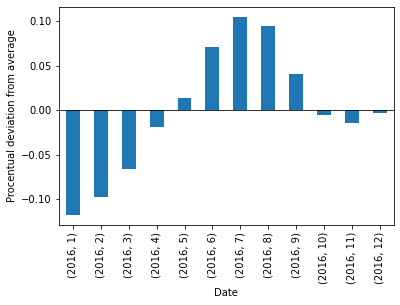

In [16]:
plot_bar_average(df_cal_notna_monthly["price dif mean %"],"pricespike_month.png", "Date", "Procentual deviation from average", print_xaxis = True)

Disclaimer
- only non booked bnbs are counted for the price spike -> with the dataset not possible in a different way
- grouped by month because it is a nice representation but another time clustering could be more appropriate driven from the data
- only unbooked nights have a time specific price